In [1]:
# Review Segmentation Using KMeans

# Import Required Libraries

In [2]:
# Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

<span class="mark">IMPLEMENTATION METHOD 1:</span>

# Load and Preprocess Data

In [3]:
# Method 1:
df = pd.read_csv('Datasets/sentiments/imdb_labelled.txt', sep='\t', header=None, names=['Review', 'Label'])
df.head()

,Review,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


# Text Vectorization

In [4]:
# Let's represent these reviews using TF-IDFvectoriser
# Method 1:
vectorizer = TfidfVectorizer(stop_words='english')
X_scaled_data = vectorizer.fit_transform(df['Review'])
X_scaled_data

<748x2811 sparse matrix of type '<class 'numpy.float64'>'
	with 6251 stored elements in Compressed Sparse Row format>

# Train Model

In [5]:
# Train model
# Choose the optimal number of clusters (K)
optimal_k = 3

# Train KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled_data)
df.head(100)


,Review,Label,Cluster
0,"A very, very, very slow-moving, aimless movie ...",0,1
1,Not sure who was more lost - the flat characte...,0,2
2,Attempting artiness with black & white and cle...,0,2
3,Very little music or anything to speak of.,0,2
4,The best scene in the movie was when Gerardo i...,1,1
...,...,...,...
95,Worst hour and a half of my life!Oh my gosh!,0,2
96,I had to walk out of the theatre for a few min...,0,2
97,I hate movies like that.,0,2
98,"Yeah, the movie pretty much sucked.",0,1


# Analyse Results

In [6]:
# Analyze the results
for cluster in range(optimal_k):
    print(f"Cluster {cluster + 1}:")
    print(df[df['Cluster'] == cluster]['Review'].values[:3])
    print("=" * 50)

Cluster 1:
["This if the first movie I've given a 10 to in years.  "
 'I gave it a 10  ' '10/10  ']
Cluster 2:
['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  '
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  "]
Cluster 3:
['Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  '
 'Very little music or anything to speak of.  ']


# Assign Meaningful Categories to Clusters

In [7]:
# Analyze and assign meaningful categories
cluster_labels = []
for cluster in range(optimal_k):  # Change to the number of clusters used
    cluster_data = df[df['Cluster'] == cluster]['Review']
    common_words = pd.Series(' '.join(cluster_data).split()).value_counts()[:10]
    category_label = ', '.join(common_words.index)
    cluster_labels.append(category_label)
 
  
    # Print meaningful categories for each cluster
for cluster, label in enumerate(cluster_labels):
    print(f'Cluster {cluster}: {label}')

Cluster 0: a, 10, of, I, out, this, movie, The, the, it
Cluster 1: the, a, 0, of, 1, is, and, movie, I, this
Cluster 2: the, and, a, of, is, to, I, in, was, The


# Plot Cluster Graph

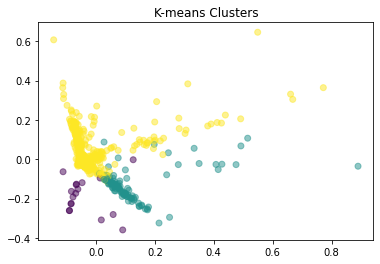

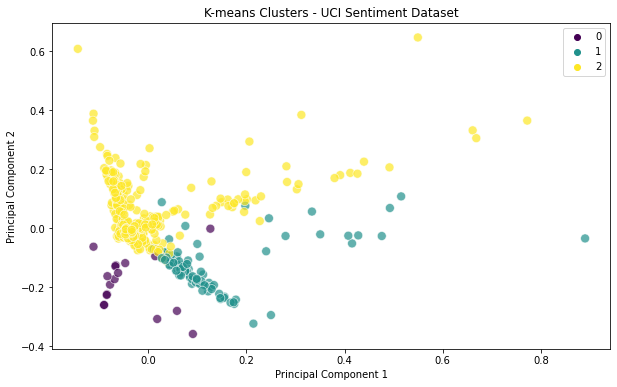

In [8]:
# Applies Principal Component Analysis (PCA) for dimensionality reduction to visualize the clusters in 2D.
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X_scaled_data.toarray())
df[['PCA1', 'PCA2']] = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])

# Plot the clusters Using matplotlib
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clusters')
plt.show()


# Plot the clusters using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7, s=80)
plt.title('K-means Clusters - UCI Sentiment Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [9]:
# Extract cluster centroids
centroids = kmeans.cluster_centers_

# Assuming each feature has a specific meaning, you can analyze the centroids
# to interpret the characteristics of each cluster
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} centroid: {centroid}")
    # Add your own logic to interpret the centroid and assign a meaningful category

  
    # Now, you can assign labels to your original data based on the clusters
cluster_labels = kmeans.predict(X_scaled_data)

# Print the first few data points along with their assigned cluster labels
for i in range(optimal_k):
    print(f"Data point {i+1}: {X_scaled_data[i]} - Assigned Cluster: {cluster_labels[i]}")



Cluster 1 centroid: [0.59552195 0.         0.         ... 0.         0.         0.        ]
Cluster 2 centroid: [0.00159958 0.         0.00042656 ... 0.         0.00043329 0.        ]
Cluster 3 centroid: [0.         0.000557   0.00045065 ... 0.00087768 0.00043502 0.00059345]
Data point 1:   (0, 1524)	0.30568525346650793
  (0, 2803)	0.357813539994641
  (0, 732)	0.41237250226961275
  (0, 697)	0.41237250226961275
  (0, 1625)	0.1620112817321219
  (0, 87)	0.41237250226961275
  (0, 1627)	0.357813539994641
  (0, 2233)	0.3377788769496005 - Assigned Cluster: 1
Data point 2:   (0, 2695)	0.38200326972787424
  (0, 1117)	0.3323615114845807
  (0, 1650)	0.40575878926099107
  (0, 170)	0.3413929408540909
  (0, 385)	0.24331747376585777
  (0, 958)	0.38200326972787424
  (0, 1491)	0.3520748545801215
  (0, 2389)	0.3651484603872077 - Assigned Cluster: 2
Data point 3:   (0, 851)	0.30587731216780034
  (0, 1672)	0.2654082007612842
  (0, 1461)	0.24464991021903637
  (0, 1831)	0.19259315716290257
  (0, 1847)	0.250

# Evaluate the Model

In [10]:
# Evaluate Using Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.008628283150011238


In [11]:
# Evaluate Using Inertia

print("Inertia:", kmeans.inertia_)


Inertia: 725.7615812227474


# Model Interpretation

In [12]:
# Examine the Cluster Centres or Centroids

print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[5.95521946e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.59958132e-03 0.00000000e+00 4.26560919e-04 ... 0.00000000e+00
  4.33291669e-04 0.00000000e+00]
 [0.00000000e+00 5.56996930e-04 4.50648362e-04 ... 8.77677002e-04
  4.35015660e-04 5.93448149e-04]]


In [13]:
# Check the sizes of each cluster. This information can give you an idea of how balanced or imbalanced the clusters are.

cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
0     17
1    104
2    627
dtype: int64


# Save the Model

In [14]:
# Required Library
import pickle

#Save the model using Pickle
with open('Document Clustering Models/Document_Clustering_Model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

#Load the model using Pickle
with open('Document Clustering Models/Document_Clustering_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
    


#View the model    
loaded_model

KMeans(n_clusters=3, random_state=42)

In [15]:
# Save Using the Joblib Library
import joblib
#from sklearn.externals import joblib
joblib.dump(model, "Document Clustering Models/DocCluster.joblib")

#Loading the Model
model = joblib.load("Document Clustering Models/DocCluster.joblib")

model

NameError: name 'model' is not defined

<span class="mark">IMPLEMENTATION METHOD 2</span>

In [ ]:
# Load and Preprocess Data

In [ ]:
with open("Datasets/sentiments/imdb_labelled.txt", "r") as textfile:
    text = textfile.read().split("\n")

In [ ]:
# Create a List of sentiments separated by tabs
text = [ line.split('\t') for line in text if len(line.split('\t'))==2 and line.split('\t')[1] != '' ]

#Split text into Review and Labelled, but tke only Review
train_documents = [line[0] for line in text]
#train_documents

Text Vectorization

In [ ]:
# Let's represent these reviews using TF-IDFvectoriser
from sklearn.feature_extraction.text import TfidfVectorizer

#Let's instantiate the TFIDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

# Let's convert reviews into Tfidf
train_documents = tfidf_vectorizer.fit_transform(train_documents)

train_documents


Train Model

In [ ]:
# Let's train our model using KMeans
# Train model
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, verbose=True)
model = km.fit(train_documents)

model

Analyse Results

In [ ]:
# For us to view texts the clusters, KMeans has a property called labels_[]
count=0
for i in range(len(text)):
    if count > 3:
        break
    if model.labels_[i] == 2:
        print(text[i])
        count += 1

 Evaluate Model

In [ ]:
# Evaluate Using Silhouette Score

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

In [ ]:
# Evaluate Using Inertia

print("Inertia:", kmeans.inertia_)


Interprete Model

In [ ]:
# Examine the Cluster Centres or Centroids

print("Cluster Centers:")
print(kmeans.cluster_centers_)


In [ ]:
# Check the sizes of each cluster. This information can give you an idea of how balanced or imbalanced the clusters are.

cluster_sizes = pd.Series(kmeans.labels_).value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)


Save the Model

In [ ]:
# Required Library
import pickle

#Save the model using Pickle
with open('Document_Clustering_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

#Load the model using Pickle
with open('Document_Clustering_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
    


#View the model    
loaded_model

In [ ]:
# Save Using the Joblib Library
import joblib
#from sklearn.externals import joblib
joblib.dump(model, "DocCluster.joblib")

#Loading the Model
model = joblib.load("DocCluster.joblib")

model

In [ ]:
# Save Using Onnx

# import onnx

# #Save the model using ONNX
# onnx.dump(model, 'DoClusteringModel.onnx')

# #Load the model using ONNX
# loaded_model = onnx.load('DoClusteringModel.onnx')


# #View the Model
# loaded_model